# Lab 6 - Security Data Science

Andrés Estuardo Montoya Wilhelm

In [33]:
from scapy.all import *
from scapy.layers.inet import IP, TCP, UDP
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Preamble

In [3]:
def scapy_test():
    print("Starting packet capture...")
    
    #capture 25 packets
    packets = sniff(count=25)
    
    print("\nVariable type:", type(packets))
    print("Number of packets captured:", len(packets))
    print("\nFirst packet type:", type(packets[0]))
    
    #first 5 packets
    print("\nContent of first 5 packets:")
    for i in range(min(5, len(packets))):
        print(f"\nPacket {i+1}:")
        print(packets[i].show())

In [4]:
scapy_test()

Starting packet capture...

Variable type: <class 'scapy.plist.PacketList'>
Number of packets captured: 25

First packet type: <class 'scapy.layers.l2.Ether'>

Content of first 5 packets:

Packet 1:
###[ Ethernet ]### 
  dst       = 60:38:e0:a8:80:3a
  src       = 4e:e4:0d:79:80:25
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 192
     id        = 0
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0xa41e
     src       = 192.168.5.137
     dst       = 142.250.64.227
     \options   \
###[ UDP ]### 
        sport     = 51533
        dport     = https
        len       = 172
        chksum    = 0x753
###[ Raw ]### 
           load      = 'E\\xe8\x16.\\xef\\xf4UM6٤nL4y\\x89\\xa5\\x85\\xeb\x08\\xa6\\x8f\\xd5-\\xd3.\\x92Ӭ\\xf0\\x88\\xf3r\\xac)\\x9b9\\x82:\\xa3\\x95(\\xd5ɴ\\xc0*\\x8a\\x9b\\x8d\\x9f\x1fM(.\x05ڶ&0\\x86Y2\\xefE}8>h0ۏ\\xc0\\x80h.R?\\xc4\x12\\xf8\\xc8ؼ\\x93MsX\\xe2\\xb4\

## Analysis

In [35]:
def analyze_pcap(file):
    print("Reading PCAP file...")
    packets = rdpcap(file)
    
    # Convert packets to DataFrame
    print("\nConverting packets to DataFrame...")
    packet_list = []
    
    for packet in packets:
        if IP in packet:
            packet_info = {
                'Src Address': packet[IP].src,
                'Dst Address': packet[IP].dst,
                'Src Port': packet[TCP].sport if TCP in packet else packet[UDP].sport if UDP in packet else 'N/A',
                'Dst Port': packet[TCP].dport if TCP in packet else packet[UDP].dport if UDP in packet else 'N/A',
                'Payload Size': len(packet),
                'Time': packet.time
            }
            packet_list.append(packet_info)
    
    df = pd.DataFrame(packet_list)
    
    return df

In [36]:
df = analyze_pcap('./analisis_paquetes.pcap')


Reading PCAP file...

Converting packets to DataFrame...


In [16]:
print(df.head())

   Src Address  Dst Address  Src Port  Dst Port
0   10.1.10.53  84.54.22.33        53        53
1  84.54.22.33   10.1.10.53        53        53
2   10.1.10.53  84.54.22.33        53        53
3  84.54.22.33   10.1.10.53        53        53
4   10.1.10.53  84.54.22.33        53        53


In [13]:
print(df[['Src Address', 'Dst Address', 'Src Port', 'Dst Port']].head())

   Src Address  Dst Address  Src Port  Dst Port
0   10.1.10.53  84.54.22.33        53        53
1  84.54.22.33   10.1.10.53        53        53
2   10.1.10.53  84.54.22.33        53        53
3  84.54.22.33   10.1.10.53        53        53
4   10.1.10.53  84.54.22.33        53        53


### All source IP's

In [17]:
print(df['Src Address'].unique())

['10.1.10.53' '84.54.22.33' '75.75.75.75']


### All destination IP's

In [18]:
print(df['Dst Address'].unique())

['84.54.22.33' '10.1.10.53' '75.75.75.75']


### Most frequent source IP 

In [19]:
most_frequent_src = df['Src Address'].mode().iloc[0]
print(f"IP: {most_frequent_src}")

IP: 10.1.10.53


**Most frequent destination IP**

In [26]:
src_communications = df[df['Src Address'] == most_frequent_src]
most_frequent_dst = src_communications['Dst Address'].mode().iloc[0]
print(most_frequent_dst)

84.54.22.33


**Most frequent destination port**

In [28]:
most_frequent_port = src_communications['Dst Port'].mode().iloc[0]
print(most_frequent_port)

53


**Source ports used**

In [32]:
print(src_communications['Src Port'].unique())

[   53 15812 23903]


## Graphs

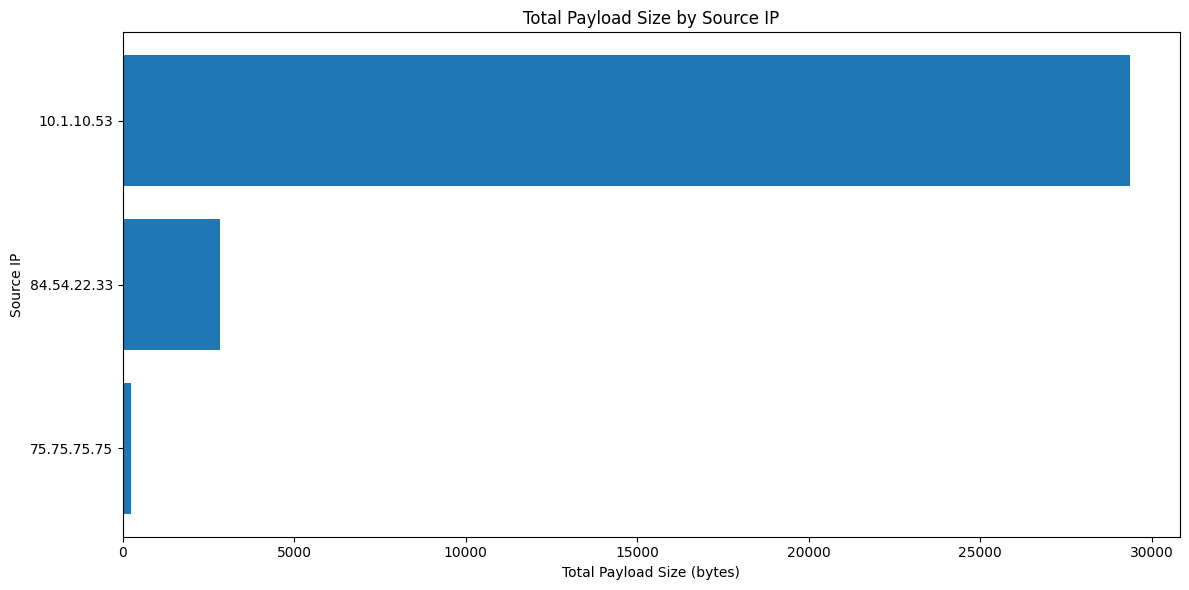

In [38]:
plt.figure(figsize=(12, 6))
src_payloads = df.groupby('Src Address')['Payload Size'].sum().sort_values(ascending=True)
plt.barh(range(len(src_payloads)), src_payloads.values)
plt.yticks(range(len(src_payloads)), src_payloads.index)
plt.xlabel('Total Payload Size (bytes)')
plt.ylabel('Source IP')
plt.title('Total Payload Size by Source IP')
plt.tight_layout()

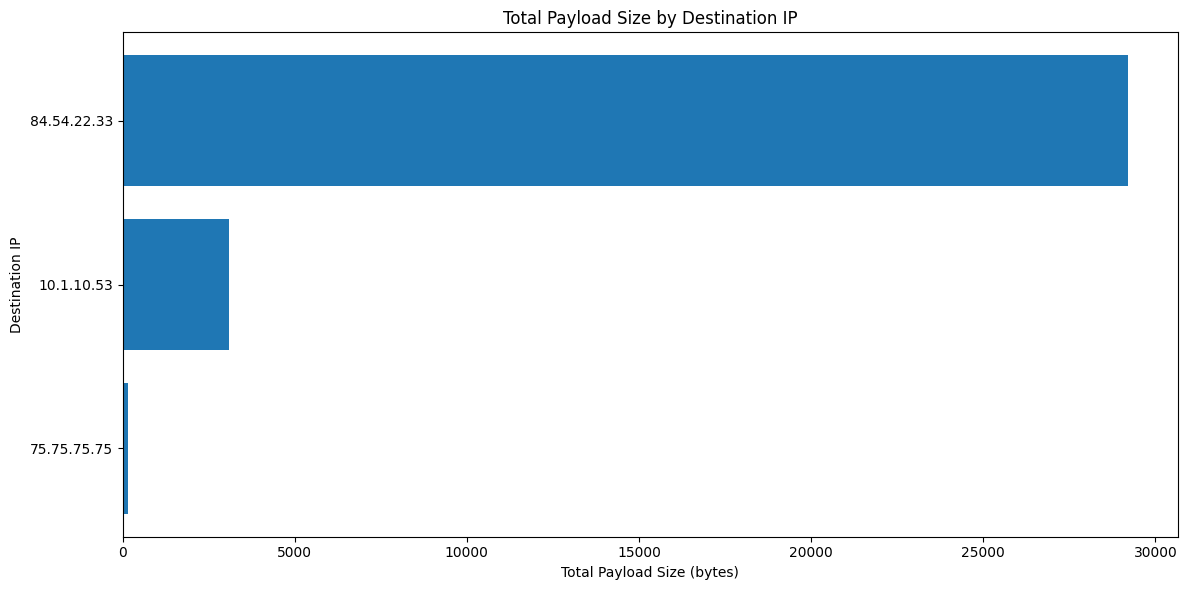

In [40]:
plt.figure(figsize=(12, 6))
dst_payloads = df.groupby('Dst Address')['Payload Size'].sum().sort_values(ascending=True)
plt.barh(range(len(dst_payloads)), dst_payloads.values)
plt.yticks(range(len(dst_payloads)), dst_payloads.index)
plt.xlabel('Total Payload Size (bytes)')
plt.ylabel('Destination IP')
plt.title('Total Payload Size by Destination IP')
plt.tight_layout()

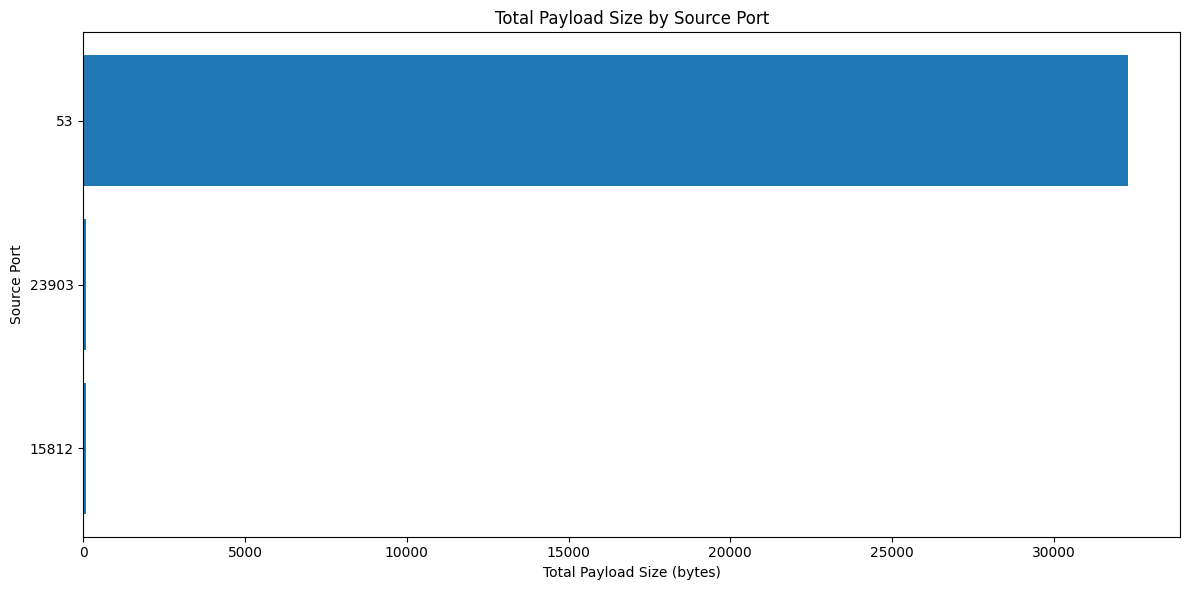

In [41]:
plt.figure(figsize=(12, 6))
src_port_payloads = df.groupby('Src Port')['Payload Size'].sum().sort_values(ascending=True)
plt.barh(range(len(src_port_payloads)), src_port_payloads.values)
plt.yticks(range(len(src_port_payloads)), src_port_payloads.index)
plt.xlabel('Total Payload Size (bytes)')
plt.ylabel('Source Port')
plt.title('Total Payload Size by Source Port')
plt.tight_layout()

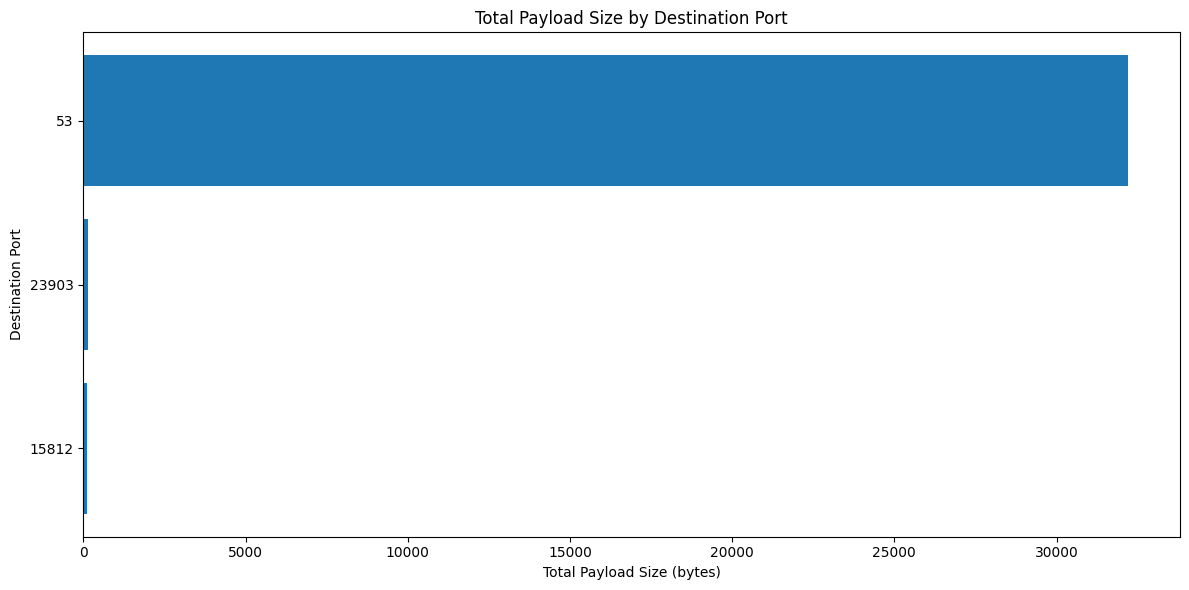

In [42]:
plt.figure(figsize=(12, 6))
dst_port_payloads = df.groupby('Dst Port')['Payload Size'].sum().sort_values(ascending=True)
plt.barh(range(len(dst_port_payloads)), dst_port_payloads.values)
plt.yticks(range(len(dst_port_payloads)), dst_port_payloads.index)
plt.xlabel('Total Payload Size (bytes)')
plt.ylabel('Destination Port')
plt.title('Total Payload Size by Destination Port')
plt.tight_layout()

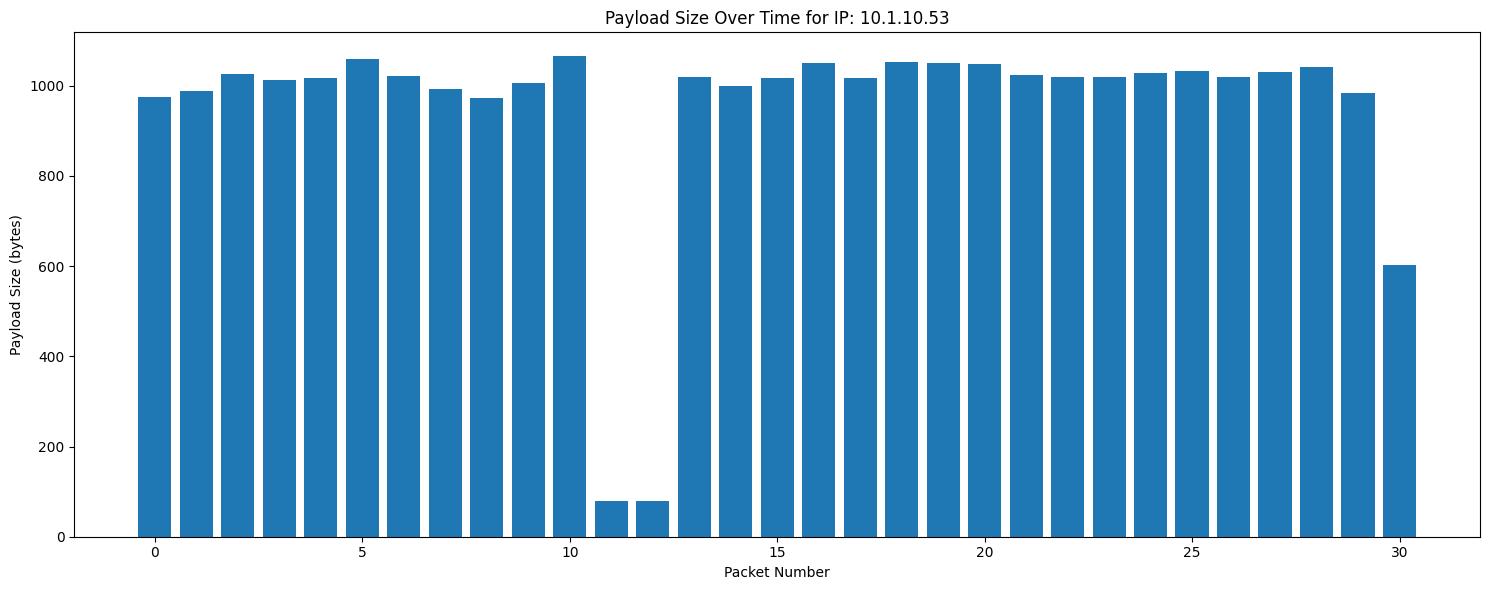

In [43]:
most_frequent_src = df['Src Address'].mode().iloc[0]
src_time_data = df[df['Src Address'] == most_frequent_src].sort_values('Time')

plt.figure(figsize=(15, 6))
plt.bar(range(len(src_time_data)), src_time_data['Payload Size'])
plt.xlabel('Packet Number')
plt.ylabel('Payload Size (bytes)')
plt.title(f'Payload Size Over Time for IP: {most_frequent_src}')
plt.tight_layout()

### Results
Al analizar las gráficas del tráfico de red capturado, se puede observar que la mayoría de la actividad se centra en una IP local (10.1.10.53) que está operando como servidor DNS, lo cual se evidencia por el uso predominante del puerto 53. El comportamiento muestra un patrón muy consistente en el tamaño de los paquetes, manteniéndose normalmente por debajo de los 1000 bytes, con algunas caídas ocasionales.

Podemos observar en el trafico, cómo el servidor DNS local se comunica tanto con direcciones internas como con algunas IPs externas (como 84.54.22.33), esto debido a que los servidores de DNS actuan como un intermediario entre los servidores locales y los externos. Los patrones de tráfico son mayormente consistentes y predecibles, lo cual significa que carecen de anomalías significativas que pudieran indicar algun tipo de problema.

## Payload Analysis

In [45]:
most_frequent_ip = df['Src Address'].mode().iloc[0]
print(f"\nMost frequent source IP: {most_frequent_ip}")
df_frequent_ip = df[df['Src Address'] == most_frequent_ip]
print("\nFirst 5 rows of DataFrame with most frequent source IP:")
print(df_frequent_ip.head())


Most frequent source IP: 10.1.10.53

First 5 rows of DataFrame with most frequent source IP:
  Src Address  Dst Address  Src Port  Dst Port  Payload Size  \
0  10.1.10.53  84.54.22.33        53        53           975   
2  10.1.10.53  84.54.22.33        53        53           989   
4  10.1.10.53  84.54.22.33        53        53          1026   
6  10.1.10.53  84.54.22.33        53        53          1012   
8  10.1.10.53  84.54.22.33        53        53          1017   

                Time  
0  1532199330.917674  
2  1532199331.937777  
4  1532199332.960504  
6  1532199333.982248  
8  1532199335.003376  


In [46]:
df_grouped = df_frequent_ip[
    ['Src Address', 
     'Dst Address', 
     'Payload Size']
].groupby('Dst Address').agg({
    'Src Address': 'first',
    'Payload Size': 'sum'
}).reset_index()
print("\nDataFrame grouped by destination with payload sum:")
print(df_grouped)


DataFrame grouped by destination with payload sum:
   Dst Address Src Address  Payload Size
0  75.75.75.75  10.1.10.53           158
1  84.54.22.33  10.1.10.53         29197


In [47]:
suspicious_ip = df_grouped.loc[df_grouped['Payload Size'].idxmax(), 'Dst Address']
max_payload = df_grouped['Payload Size'].max()
print(f"\nSuspicious IP (highest byte exchange): {suspicious_ip}")
print(f"Total bytes exchanged: {max_payload}")


Suspicious IP (highest byte exchange): 84.54.22.33
Total bytes exchanged: 29197


In [49]:
df_conversation = df[
    ((df['Src Address'] == most_frequent_ip) & (df['Dst Address'] == suspicious_ip)) |
    ((df['Src Address'] == suspicious_ip) & (df['Dst Address'] == most_frequent_ip))
]
print("\nConversation between most frequent IP and suspicious IP:")
print(df_conversation)


Conversation between most frequent IP and suspicious IP:
    Src Address  Dst Address  Src Port  Dst Port  Payload Size  \
0    10.1.10.53  84.54.22.33        53        53           975   
1   84.54.22.33   10.1.10.53        53        53            98   
2    10.1.10.53  84.54.22.33        53        53           989   
3   84.54.22.33   10.1.10.53        53        53            98   
4    10.1.10.53  84.54.22.33        53        53          1026   
5   84.54.22.33   10.1.10.53        53        53            98   
6    10.1.10.53  84.54.22.33        53        53          1012   
7   84.54.22.33   10.1.10.53        53        53            98   
8    10.1.10.53  84.54.22.33        53        53          1017   
9   84.54.22.33   10.1.10.53        53        53            98   
10   10.1.10.53  84.54.22.33        53        53          1059   
11  84.54.22.33   10.1.10.53        53        53            98   
12   10.1.10.53  84.54.22.33        53        53          1022   
13  84.54.22.33   

In [50]:
payloads_array = df_conversation['Payload Size'].values
print("\nPayloads array:")
print(payloads_array)


Payloads array:
[ 975   98  989   98 1026   98 1012   98 1017   98 1059   98 1022   98
  993   98  973   98 1006   98 1065   98 1020   98 1000   98 1018   98
 1051   98 1018   98 1053   98 1051   98 1049   98 1024   98 1020   98
 1020   98 1027   98 1033   98 1019   98 1031   98 1041   98  983   98
  602   98]


### Results
Se puede observar un patrón inusual y sospechoso donde los valores alternan constantemente entre aproximadamente 1000 bytes y exactamente 98 bytes. Esta regularidad perfecta no es típica del tráfico DNS normal (puerto 53), ya que el valor constante de 98 bytes que se repite sugiere un tipo de comunicación automatizada, lo cual merece una investigación más detallada.